# Customizing visual appearance



HoloViews elements like the `Scatter` points illustrated in the [Introduction](1-Introduction.ipynb) contain two types of information:

- **Your data**, in as close to its original form as possible, so that it can be analyzed and accessed as you see fit.
- **Metadata specifying what your data *is***, which allows HoloViews to construct an appropriate visual representation for it.

What elements do *not* contain is:

- The details that one might want to tweak about the visual representation, such as line widths, colors, fonts, and spacing.

HoloViews is designed to let you work naturally with the meaningful features of your data, while making it simple to adjust the display details separately using the Options system.  Among many other benefits, this [separation of *content* from *presentation*](https://en.wikipedia.org/wiki/Separation_of_content_and_presentation) simplifies your data analysis workflow, and makes it independent of any particular plotting backend.

## Visualizing neural spike trains

To illustrate how the options system works, we will use a dataset containing ["spike"](https://en.wikipedia.org/wiki/Action_potential) (neural firing) events extracted from the recorded electrical activity of a [neuron](https://en.wikipedia.org/wiki/Neuron). We will be visualizing the first trial of this [publicly accessible neural recording](https://web.archive.org/web/20240623195151/https://www.neuralsignal.org/data/04/nsa2004.4/433l019). First, we import pandas and holoviews and load our data:

In [1]:
import pandas as pd

import holoviews as hv
from holoviews import opts

#load the spike_train data
spike_train = pd.read_csv('../assets/spike_train.csv.gz')
spike_train.head(n=3)

,milliseconds,Hertz
0,53,50.0
1,62,60.0
2,66,65.0


This dataset contains the spike times (in milliseconds) for each detected spike event in this five-second recording, along with a spiking frequency in Hertz (spikes per second), averaged over a rolling 200 millisecond window. We will now declare Holoviews ``Curve`` and ``Spike`` elements using this data and combine them into a ``Layout``, building on the last module.

In [2]:
#Create a Curve object from teh spike_train dataframe, the milliseconds column as x-axis and Hertz column as y-axis
curve  = hv.Curve( spike_train, 'milliseconds', 'Hertz', label='Firing Rate')

#Create a Spikes object from the spike_train dataframe, the milliseconds column as x-axis, leaving y-axis empty
spikes = hv.Spikes(spike_train, 'milliseconds', [],      label='Spike Train')

#Combine the Curve and Spikes objects into a single layout
layout = curve + spikes
layout

:Layout
   .Curve.Firing_Rate  :Curve   [milliseconds]   (Hertz)
   .Spikes.Spike_Train :Spikes   [milliseconds]

Notice that the representation for this object is purely textual; so far we have not yet loaded any plotting system for HoloViews, and so all you can see is a description of the data stored in the elements. 

To be able to see a visual representation and adjust its appearance, we'll need to load a plotting system, and here let's load two so they can be compared:

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
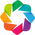

In [3]:
hv.extension('bokeh', 'matplotlib')

Even though we can happily create, analyze, and manipulate HoloViews objects without using any plotting backend, this line is normally executed just after importing HoloViews so that objects can have a rich graphical representation rather than the very-limited textual representation shown above. Putting 'bokeh' first in this list makes visualizations default to using [Bokeh](https://bokeh.pydata.org), but including [matplotlib](https://matplotlib.org) as well means that backend can be selected for any particular plot as shown below.

# Default appearance

With the extension loaded, let's look at the default appearance as rendered with Bokeh:

In [4]:
layout

:Layout
   .Curve.Firing_Rate  :Curve   [milliseconds]   (Hertz)
   .Spikes.Spike_Train :Spikes   [milliseconds]

As you can see, we can immediately appreciate more about this dataset than we could from the textual representation.  The curve plot, in particular, conveys clearly that the firing rate varies quite a bit over this 5-second interval.  However, the spikes plot is much more difficult to interpret, because the plot is nearly solid black.  

One thing we can do is click on one of the Bokeh plot's zoom tools to enable it, then zoom in until individual spikes are clearly visible.  Even then, though, it's difficult to relate the spiking and firing-rate representations to each other.  Maybe we can do better by adjusting the display options away from their default settings?

## Customization

Let's see what we can achieve when we do decide to customize the appearance:

In [ ]:
#Call the layout.opts() method to customize the appearance of both the Curve and Spikes plots
layout.opts(
    opts.Curve( height=200, width=900,  #specify height and width
               xaxis=None, line_width=1.50, #remove x-axis, set line width
               color='red', tools=['hover']),#set line color and enable hover tool
    opts.Spikes(height=150, width=900, #specify height and width
                yaxis=None, line_width=0.25, #remove y-axis, set line width
                color='grey')).cols(1)#set the line color to grey,number of columns to 1

:Layout
   .Curve.Firing_Rate  :Curve   [milliseconds]   (Hertz)
   .Spikes.Spike_Train :Spikes   [milliseconds]

Much better! It's the same underlying data, but now we can clearly see both the individual spike events and how they affect the moving average.  You can also see how the moving average trails the actual spiking, due to how the window function was defined.

A detailed breakdown of this exact customization is given in the [User Guide](../user_guide/03-Applying_Customizations.ipynb), but we can use this example to understand a number of important concepts:

* The options system is based around keyword settings supplied to the `.opts()` method.
* Collections of keyword options can be built for a given element type using an "options builder" object, such as `opts.Curve` and `opts.Spikes` here, so that we can set options separately for each component of a composite object (as for height here)
* Options builders also provide early *validation* of keywords (allowing errors to be detected even before the options are applied to an element) as well as *tab-completion* in IPython (try adding a comma to the `opts.Curve` or `opts.Spikes` keyword list to see what's available!).
* The layout container has a ``cols`` method to specify the number of columns in the layout.

The corresponding [User Guide](../user_guide/03-Applying_Customizations.ipynb) entry explains the keywords used in detail, but a quick summary is that when you tab-complete using the `opts.*` builders, you are completing across two fundamental types of options: ***plot options*** (processed by HoloViews) and ***style options*** (processed by the underlying backend, either Bokeh or Matplotlib here).

# Discovering options

In the above cell, the result of calling `opts.Curve()` is passed into the `.opts` method returning an `Options` object. `opts.Curve()` and the other option builders aren't always needed, but they are very helpful for validating options and offer tab completion to help you discover possible values:

In [ ]:
#Create a new Curve object with different customization options
dotted_options = opts.Curve(color='purple', #set line color to purple
                            width=600, height=250, #line width
                            line_dash='dotted'#set line style to dotted
                            )
dotted_options

Options('Curve', color='purple', height=250, line_dash='dotted', width=600)

Try tab-completing the options for `Curve` above or specifying an invalid keyword. Now the `dotted_options` object can be passed to the `.opts` method call to customize a `Curve`:

In [ ]:
#using out Spiked_train data, create a new Curve object with the same x and y axes
dotted = hv.Curve(spike_train, 'milliseconds', 'Hertz')
dotted.opts(dotted_options)#apply the dotted_options to the new Curve object rather than redefining them as above

:Curve   [milliseconds]   (Hertz)

When working directly with a single element, you can omit the options builder entirely because it's clear what type the options apply to:

In [8]:
#Create the same Curve object using spike_train data and milliseconds and Hertz columns
dashed = hv.Curve( spike_train, 'milliseconds', 'Hertz')
dashed.opts(color='orange', width=600, height=250, line_dash='dashed')#customize the appearance directly within the opts() method

:Curve   [milliseconds]   (Hertz)

The code is then a bit shorter and more readable with the same result, but it no longer tab completes, and so omitting the builder is probably only useful for a final, published set of code, not during exploration. When using the `.opts` method on compositions of elements (i.e., layouts or overlays) you still need to use the options builders to indicate which type of object the options should be applied to. 

If you want to find out which options have been changed on a given object, you can use `.opts.info()`:

In [9]:
dashed.opts.info()

:Curve   [milliseconds]   (Hertz)
 | Options(color='orange', height=250, line_dash='dashed', width=600)


For more information on how to work with options, see the the [User Guide](../user_guide/03-Applying_Customizations.ipynb).

# Switching to matplotlib

Now let's customize our `layout` with options appropriate for the [Matplotlib](https://matplotlib.org) renderer, by supplying options associated with the matplotlib backend to the `.opts` method:

In [11]:

#Create a layout combining the dotted and dashed Curve objects
layout = layout.opts( #use the opts to customize the overall layout with MPL
    opts.Curve( aspect=6, xaxis=None,   #remove x-axis, set aspect ratio
               color='blue', linewidth=2, #set line color and width
               show_grid=False, linestyle='dashed', #remove grid lines, set line style
               backend='matplotlib'),#set backend to matplotlib
    opts.Spikes(aspect=6, yaxis='bare', #remove y-axis, set aspect ratio
                color='red',  linewidth=0.25, #set line color and width
                backend='matplotlib'), #set backend to matplotlib
    opts.Layout(sublabel_format='', vspace=0.1, #set vertical space between plots
                fig_size=200, backend='matplotlib')#set figure size and backend
    )
layout

:Layout
   .Curve.Firing_Rate  :Curve   [milliseconds]   (Hertz)
   .Spikes.Spike_Train :Spikes   [milliseconds]

These options are now associated with matplotlib (due to `backend='matplotlib'`) even though the plot is still rendered with bokeh as we haven't switched to the matplotlib backend just yet (although matplotlib support was was loaded by `hv.extension` at the start of this notebook). The above code sets the options appropriate to matplotlib without immediately making use of them and naturally, a few changes needed to be made:

* Some of the options are different because of differences in how the plotting backends work. For instance, matplotlib uses ``aspect`` instead of setting ``width`` and ``height``. In some cases, but not all, HoloViews can smooth over such differences in the *plotting* options to make it simpler to switch backends.
* The Bokeh hover tool is not supported by the matplotlib backend, as you might expect, nor are there any other interactive controls, because the Matplotlib backend generates static PNG or SVG images.
* Some options have different names; for instance, the Bokeh ``line_width`` option is called ``linewidth`` in matplotlib. These "style" options are directly inherited from the API of the plotting library backend, not defined by HoloViews.
* Containers like `Layout`s also have some options to control the arrangement of its components. Here we adjust the gap between the plots using ``vspace``.

Now we can use the `hv.output` utility to to show the same elements in `layout` as rendered with these different customizations, in a different output format (SVG), with a completely different plotting library:

In [ ]:
#Display the layout using the matplotlib backend and print as an SVG file
hv.output(layout, backend='matplotlib', fig='svg')

:Layout
   .Curve.Firing_Rate  :Curve   [milliseconds]   (Hertz)
   .Spikes.Spike_Train :Spikes   [milliseconds]

This approach allows you to associate options for multiple different backends with the same object. See the [User Guide](../user_guide/03-Applying_Customizations.ipynb) for more details, including information of how to use `hv.output` to affect global output settings.

## Persistent styles

Let's switch back to the default (Bokeh) plotting extension for this notebook and apply the ``.select`` operation illustrated in the Introduction, to the ``spikes`` object we made earlier:

In [13]:
hv.output(backend='bokeh') #switch back to bokeh backend
spikes.select(milliseconds=(2000,4000))#display only spikes between 2000 and 4000 milliseconds

:Spikes   [milliseconds]

Note how HoloViews remembered the Bokeh-specific styles we previously applied to the `spikes` object! This feature allows us to style objects once and then keep that styling as we work, without having to repeat the styles every time we work with that object. Note that even though this styling is associated with the element, it is not actually stored on it.  

If we want to reset back to the original styling, we can call `.opts.clear()`:

In [ ]:
spikes.select(milliseconds=(2000,4000)).opts.clear() #clear any previous customizations in options

:Spikes   [milliseconds]

You can learn more about the output utility and how the options system handles persistent options in the [User Guide](../user_guide/03-Applying_Customizations.ipynb).

## Setting axis labels

There is no limitation involved with labeling axes.  Dimensions specified as strings are often convenient, but behind the scenes, HoloViews always uses a much richer ``Dimensions`` object that you can pass to the ``kdims`` and ``vdims`` explicitly (see the [User Guide](../user_guide/01-Annotating_Data.ipynb) for more information). One of the things each ``Dimension`` object supports is a long, descriptive ``label``,  which complements the short programmer-friendly name.

We can set the dimension labels on our existing ``spikes`` object as follows:

In [ ]:
#Redefine the labels for the x-axis of the Spikes and Curve objects
spikes = spikes.redim.label(milliseconds='Time in milliseconds (10⁻³ seconds)')
curve  = curve.redim.label(Hertz='Frequency (Hz)')
(curve + spikes).select(milliseconds=(2000,4000)).cols(1) 

:Layout
   .Curve.Firing_Rate  :Curve   [milliseconds]   (Frequency (Hz))
   .Spikes.Spike_Train :Spikes   [milliseconds]

As you can see, we can set long descriptive labels on our dimensions (including unicode) while still making use of the short dimension name in methods like ``select``.  

Now that you know how to set up and customize basic visualizations, the next [Getting-Started sections](./3-Tabular_Datasets.ipynb) show how to work with various common types of data in HoloViews.